## Stylized Facts

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Stylized fact 1

Asset prices and portfolio values follow a random walk


In [2]:
#download the historic prices
asset = 'V'
serie = yf.Ticker(asset).history(period='5y',interval='1d')['Close']
serie.tail()

Date
2025-09-04 00:00:00-04:00    350.989990
2025-09-05 00:00:00-04:00    343.220001
2025-09-08 00:00:00-04:00    342.299988
2025-09-09 00:00:00-04:00    343.989990
2025-09-10 00:00:00-04:00    338.940002
Name: Close, dtype: float64

Text(0.5, 1.0, 'V daily prices')

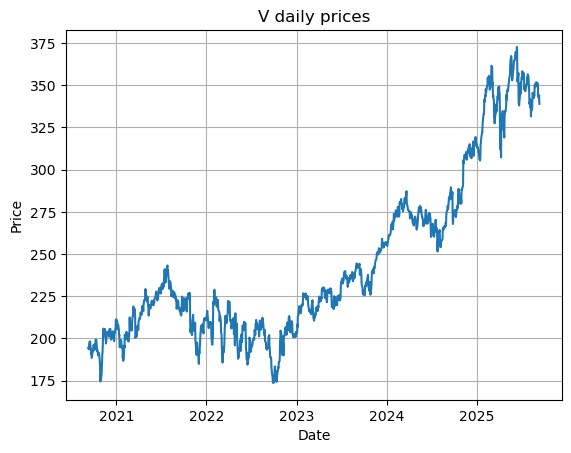

In [3]:
# plot of the historic prices
plt.plot(serie)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"{asset} daily prices")

¿Does it have a definite trend?

¿Does it have different periods with different trends?


Remember

random walk means:

$P_{t+1}=P_{t}+\epsilon_{t+1}$

thus:

$\epsilon_{t+1}=P_{t+1}-P_{t}$

In [4]:
epsilon_t1 = serie.diff()
#epsilon_t1 = serie - serie.shift(1)
epsilon_t1.tail()

Date
2025-09-04 00:00:00-04:00    0.119995
2025-09-05 00:00:00-04:00   -7.769989
2025-09-08 00:00:00-04:00   -0.920013
2025-09-09 00:00:00-04:00    1.690002
2025-09-10 00:00:00-04:00   -5.049988
Name: Close, dtype: float64

Is the Expected value of the error 0?

$E[\epsilon_{t}]=0$

In [5]:
epsilon_t1.mean()

0.11512772153573207


Is there no correlation between the errors of a period and those of previous periods?


$E[\epsilon_t\epsilon_{t-s}]=\text{Cov}[\epsilon_t,\epsilon_{t-s}]=0$



In [6]:
[(epsilon_t1*epsilon_t1.shift(i)).mean() for i in range(1,10)]


[-0.2364325422369927,
 0.2781457725370857,
 -0.5350827162199395,
 0.03449288238942486,
 -0.19348308962155134,
 -1.1740461496134447,
 -0.13180752192326906,
 0.055445644050035936,
 -0.15888449167765462]

In [7]:
[epsilon_t1.cov(epsilon_t1.shift(i)) for i in range(1,10)]

[-0.2504507118043811,
 0.26506391439281507,
 -0.5488810764525717,
 0.020403875629152163,
 -0.2077528333315883,
 -1.1893082621545916,
 -0.14691848195981308,
 0.04094433852128785,
 -0.17413045554281925]

### Stylized fact 2

The distribution of yields has an approximately "bell-shaped" shape

Now we get the log returns

$R_{t+1}=\ln(\frac{P_{t+1}}{P_{t}})$

In [8]:
P_t1 = serie #today
P_t1.tail()

Date
2025-09-04 00:00:00-04:00    350.989990
2025-09-05 00:00:00-04:00    343.220001
2025-09-08 00:00:00-04:00    342.299988
2025-09-09 00:00:00-04:00    343.989990
2025-09-10 00:00:00-04:00    338.940002
Name: Close, dtype: float64

In [9]:
P_t = serie.shift(1) #yesterday
P_t.tail()


Date
2025-09-04 00:00:00-04:00    350.869995
2025-09-05 00:00:00-04:00    350.989990
2025-09-08 00:00:00-04:00    343.220001
2025-09-09 00:00:00-04:00    342.299988
2025-09-10 00:00:00-04:00    343.989990
Name: Close, dtype: float64

In [10]:
R_t1 = np.log(P_t1/P_t).dropna() #todays returns
R_t1.tail()

Date
2025-09-04 00:00:00-04:00    0.000342
2025-09-05 00:00:00-04:00   -0.022386
2025-09-08 00:00:00-04:00   -0.002684
2025-09-09 00:00:00-04:00    0.004925
2025-09-10 00:00:00-04:00   -0.014789
Name: Close, dtype: float64

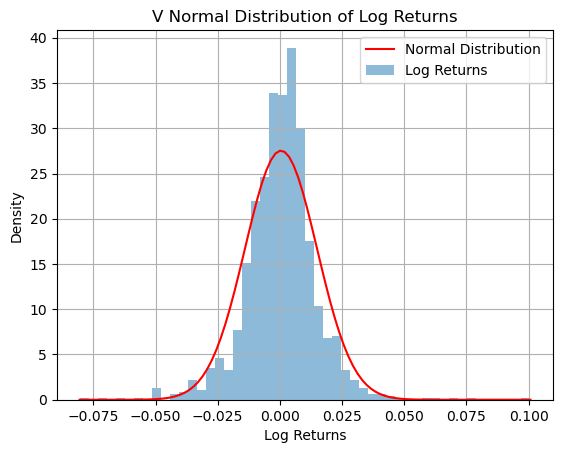

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

mu, sigma = np.mean(R_t1), np.std(R_t1)

x_vals = np.linspace(min(R_t1.values), max(R_t1.values), 100)

y_vals = stats.norm.pdf(x_vals, mu, sigma)

plt.plot(x_vals, y_vals, "r-", label="Normal Distribution")
plt.hist(R_t1, bins=50, density=True, alpha=0.5, label="Log Returns")
plt.grid()
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.title(f"{asset} Normal Distribution of Log Returns")
plt.legend()
plt.show()


Does it have a bell-shaped shape?

### Stylized Fact 3

Asset returns exhibit non-contant and clustered volatility (varianza que va cambiando en el tiempo)

Text(0.5, 1.0, 'V daily returns')

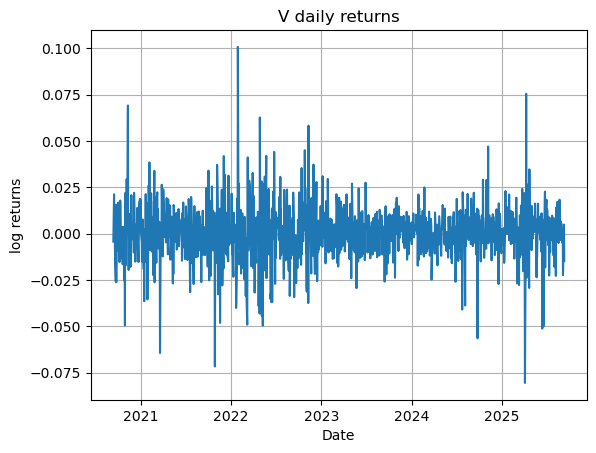

In [12]:
plt.plot(R_t1)
plt.grid()
plt.xlabel("Date")
plt.ylabel("log returns")
plt.title(f"{asset} daily returns")

Is the volatility clustered?

### Stylized fact 4

the distribution of yields presents leptocurtosis

In [13]:
R_t1.kurtosis()

5.181135296022442

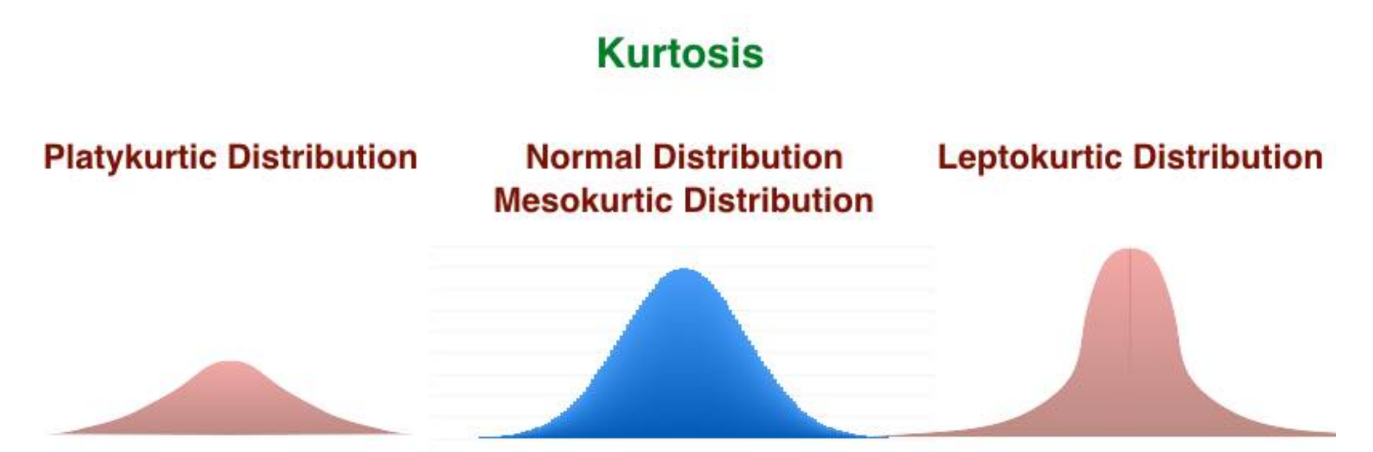

Is the distribution leptokurtic?

### Assumptions

Within the modern theory that we will study about price of assets and theeir performance we must keep in mind that there will be two assumptions



*   Price performance (not price) has a normal behavior
*   The change in price from one day to the next is independent



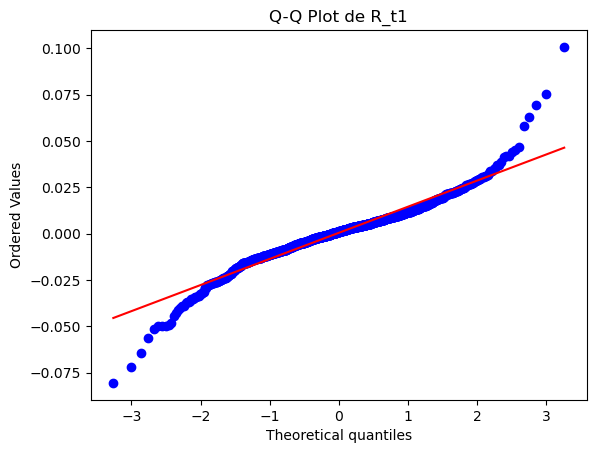

KS Test: D = 0.06629868588871268, p-value = 3.065552013411419e-05
Rechazamos la normalidad (p <= 0.05).


In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot
stats.probplot(R_t1, dist="norm", plot=plt)
plt.title("Q-Q Plot de R_t1")
plt.show()

D, p_value = stats.kstest(R_t1, 'norm', args=(R_t1.mean(), R_t1.std()))
print(f"KS Test: D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("No hay evidencia suficiente para rechazar la normalidad (p > 0.05).")
else:
    print("Rechazamos la normalidad (p <= 0.05).")
